In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
df=pd.read_csv('input/zomato.csv')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [70]:
df=df.dropna(axis=0,how="any")

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23193 entries, 0 to 51715
Data columns (total 17 columns):
url                            23193 non-null object
address                        23193 non-null object
name                           23193 non-null object
online_order                   23193 non-null object
book_table                     23193 non-null object
rate                           23193 non-null object
votes                          23193 non-null int64
phone                          23193 non-null object
location                       23193 non-null object
rest_type                      23193 non-null object
dish_liked                     23193 non-null object
cuisines                       23193 non-null object
approx_cost(for two people)    23193 non-null object
reviews_list                   23193 non-null object
menu_item                      23193 non-null object
listed_in(type)                23193 non-null object
listed_in(city)                23193 non-nul

In [72]:
df.online_order=df.iloc[:,3].values
df.online_order

0        Yes
1        Yes
2        Yes
3         No
4         No
5        Yes
7        Yes
8        Yes
9        Yes
10       Yes
11       Yes
12       Yes
13        No
14       Yes
15       Yes
16       Yes
17       Yes
18        No
20       Yes
21       Yes
23       Yes
29        No
30       Yes
31       Yes
33       Yes
34       Yes
35       Yes
37       Yes
38       Yes
40       Yes
        ... 
51677     No
51681     No
51682     No
51683     No
51684     No
51685     No
51686     No
51687    Yes
51688    Yes
51689     No
51690     No
51691     No
51692    Yes
51693    Yes
51694    Yes
51695    Yes
51696     No
51697    Yes
51698     No
51699    Yes
51700     No
51701    Yes
51702     No
51703    Yes
51704     No
51705    Yes
51707     No
51708     No
51711     No
51715     No
Name: online_order, Length: 23193, dtype: object

In [73]:
df.rate = df.rate.str.replace('/5','')

In [74]:
df.rate = df.rate.str.replace('NEW','0').replace('-','')
df.rate = df.rate.str.strip()
df.rate =df.rate.replace('','0')
df.rate=df.rate.astype(float)

In [75]:
df.rate

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
5        3.8
7        4.6
8        4.0
9        4.2
10       4.1
11       4.2
12       4.2
13       4.0
14       3.8
15       3.8
16       3.9
17       3.8
18       3.9
20       3.0
21       3.7
23       3.6
29       3.8
30       4.0
31       2.8
33       3.9
34       4.2
35       3.9
37       4.2
38       4.4
40       3.8
        ... 
51677    2.5
51681    4.3
51682    4.5
51683    4.1
51684    4.3
51685    4.7
51686    4.6
51687    4.4
51688    4.0
51689    4.1
51690    4.2
51691    4.2
51692    3.9
51693    4.1
51694    4.1
51695    4.2
51696    4.3
51697    4.4
51698    3.9
51699    4.1
51700    4.1
51701    4.1
51702    4.0
51703    3.9
51704    4.0
51705    3.8
51707    3.9
51708    2.8
51711    2.5
51715    4.3
Name: rate, Length: 23193, dtype: float64

In [76]:
from sklearn.preprocessing import LabelEncoder

In [77]:
encoder = LabelEncoder()
encoder.fit(df.online_order)
df.online_order = encoder.transform(df.online_order)
df.online_order

0        1
1        1
2        1
3        0
4        0
5        1
7        1
8        1
9        1
10       1
11       1
12       1
13       0
14       1
15       1
16       1
17       1
18       0
20       1
21       1
23       1
29       0
30       1
31       1
33       1
34       1
35       1
37       1
38       1
40       1
        ..
51677    0
51681    0
51682    0
51683    0
51684    0
51685    0
51686    0
51687    1
51688    1
51689    0
51690    0
51691    0
51692    1
51693    1
51694    1
51695    1
51696    0
51697    1
51698    0
51699    1
51700    0
51701    1
51702    0
51703    1
51704    0
51705    1
51707    0
51708    0
51711    0
51715    0
Name: online_order, Length: 23193, dtype: int64

In [78]:
df.book_table=df.iloc[:,4].values
df.book_table

0        Yes
1         No
2         No
3         No
4         No
5         No
7        Yes
8         No
9         No
10        No
11       Yes
12       Yes
13        No
14        No
15        No
16        No
17        No
18        No
20        No
21        No
23        No
29        No
30        No
31        No
33        No
34        No
35        No
37        No
38        No
40        No
        ... 
51677     No
51681    Yes
51682    Yes
51683    Yes
51684    Yes
51685    Yes
51686     No
51687    Yes
51688    Yes
51689    Yes
51690    Yes
51691    Yes
51692    Yes
51693    Yes
51694     No
51695    Yes
51696    Yes
51697    Yes
51698     No
51699    Yes
51700    Yes
51701    Yes
51702     No
51703    Yes
51704    Yes
51705    Yes
51707     No
51708     No
51711     No
51715    Yes
Name: book_table, Length: 23193, dtype: object

In [79]:
encoder = LabelEncoder()
encoder.fit(df.book_table)
df.book_table = encoder.transform(df.book_table)
df.book_table

0        1
1        0
2        0
3        0
4        0
5        0
7        1
8        0
9        0
10       0
11       1
12       1
13       0
14       0
15       0
16       0
17       0
18       0
20       0
21       0
23       0
29       0
30       0
31       0
33       0
34       0
35       0
37       0
38       0
40       0
        ..
51677    0
51681    1
51682    1
51683    1
51684    1
51685    1
51686    0
51687    1
51688    1
51689    1
51690    1
51691    1
51692    1
51693    1
51694    0
51695    1
51696    1
51697    1
51698    0
51699    1
51700    1
51701    1
51702    0
51703    1
51704    1
51705    1
51707    0
51708    0
51711    0
51715    1
Name: book_table, Length: 23193, dtype: int64

# Plot showing resturant taking  online or ofline orders

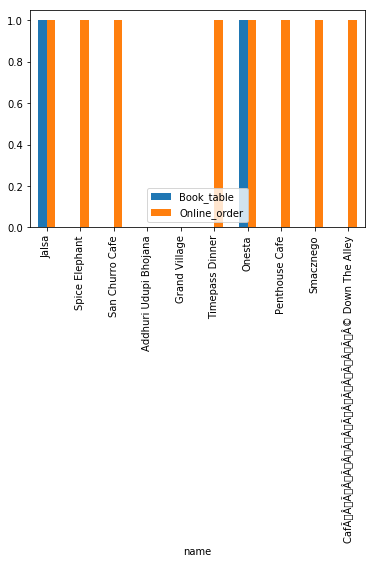

In [80]:
df=pd.DataFrame(list(zip(df.book_table.head(10),df.online_order.head(10))),
               columns=["Book_table","Online_order"],
               index=df.name.head(10)
               )
df.plot(kind="bar")